In [1]:
%matplotlib notebook

In [2]:
import cv2
import mediapipe as mp
import urllib.request
import numpy as np
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import animation
import PyQt5
from PIL import Image
from IPython.display import Video
import my_nb_helpers

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic
mp_pose = mp.solutions.pose
mp_face_mesh = mp.solutions.face_mesh

poselandmarks_list = my_nb_helpers.poselandmarks_list

# if having trouble with QT stuff, run this before ipython
#export QT_QPA_PLATFORM=offscreen


file = './tbar-rows_training_set/tbar-rows-start.mp4'

with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:

	# Create VideoCapture object
    cap = cv2.VideoCapture(file)

	# Raise error if file cannot be opened
    if cap.isOpened() == False:
        print("Error opening video stream or file")
        raise TypeError

	# Get the number of frames in the video
    length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # Create a NumPy array to store the pose data as before
    # The shape is 3x33x144 - 3D XYZ data for 33 landmarks across 144 frames
    # data = np.empty((3, len(poselandmarks_list), length))    
    data = np.empty((3, 33, length))    
    
	# For each image in the video, extract the spatial pose data and save it in the appropriate spot in the `data` array 
    frame_num = 0
    while cap.isOpened():
        ret, image = cap.read()
        if not ret:
            break

        image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)
        results = pose.process(image)
        
        landmarks = results.pose_world_landmarks.landmark
        # landmarks = results.pose_landmarks.landmark
        for i in range(len(mp_pose.PoseLandmark)):
            data[:, i, frame_num] = (landmarks[i].x, landmarks[i].y, landmarks[i].z)  
        
        frame_num += 1
    
    # Close the video file
    cap.release()


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [3]:
data.shape[-1]

446

<IPython.core.display.Javascript object>


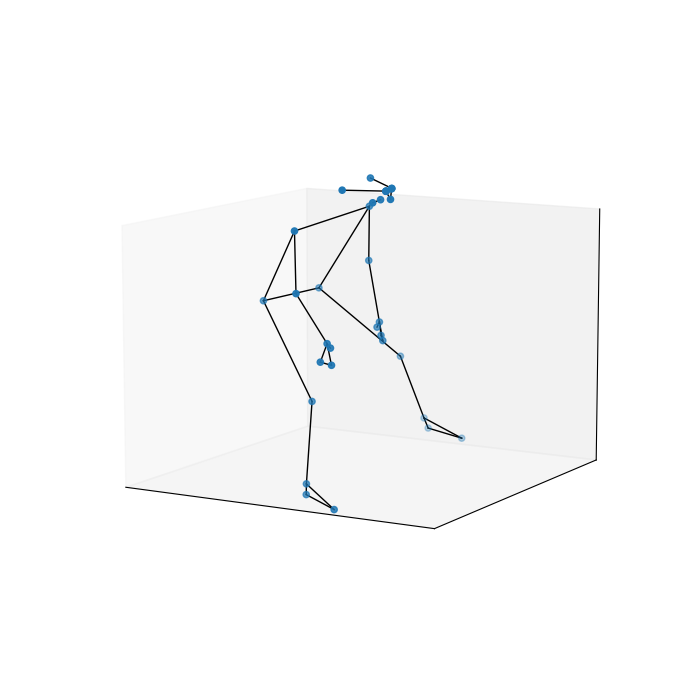

Number of frames before animation.FuncAnimation call
446


In [4]:
fig = plt.figure()
fig.set_size_inches(7, 7, True)
ax = fig.add_subplot(projection='3d')

anim = my_nb_helpers.time_animate(data, fig, ax)

In [5]:
plt.show()

In [6]:
anim